# Player Value Prediction

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

%matplotlib inline

In [50]:
df = pd.read_csv('E:/Downloads/Datasets/FIFA 24 Player Stats Dataset.csv', encoding='latin-1')
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00


### Exploratory Data Analysis

In [51]:
df.shape

(5682, 41)

In [52]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [53]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['player', 'country', 'club', 'marking', 'value']

In [54]:
df.dtypes

player            object
country           object
height             int64
weight             int64
age                int64
club              object
ball_control       int64
dribbling          int64
marking           object
slide_tackle       int64
stand_tackle       int64
aggression         int64
reactions          int64
att_position       int64
interceptions      int64
vision             int64
composure          int64
crossing           int64
short_pass         int64
long_pass          int64
acceleration       int64
stamina            int64
strength           int64
balance            int64
sprint_speed       int64
agility            int64
jumping            int64
heading            int64
shot_power         int64
finishing          int64
long_shots         int64
curve              int64
fk_acc             int64
penalties          int64
volleys            int64
gk_positioning     int64
gk_diving          int64
gk_handling        int64
gk_kicking         int64
gk_reflexes        int64


In [55]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [56]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,cristian_castro_devenish,colombia,192,84,22,atl._nacional_,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,silaldo_taffarel,brazil,181,80,31,corinthians_,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00_
2,thomas_dã¤hne,germany,193,84,29,holstein_kiel_,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,michael_sollbauer,austria,187,86,33,sk_rapid_wien_,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00_
4,diego_segovia,uruguay,191,80,23,independiente_,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00_


In [57]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

player
['cristian_castro_devenish' 'silaldo_taffarel' 'thomas_dã¤hne'
 'michael_sollbauer' 'diego_segovia']
5657

country
['colombia' 'brazil' 'germany' 'austria' 'uruguay']
135

height
[192 181 193 187 191]
45

weight
[84 80 86 83 88]
49

age
[22 31 29 33 23]
25

club
['atl._nacional_' 'corinthians_' 'holstein_kiel_' 'sk_rapid_wien_'
 'independiente_']
689

ball_control
[55 69 25 46 14]
87

dribbling
[43 70 12 48  8]
89

marking
[nan 'none']
1

slide_tackle
[68 56 13 66 14]
81

stand_tackle
[73 58 16 69 17]
83

aggression
[72 62 27 71 28]
85

reactions
[68 70 65 64 50]
62

att_position
[30 69 17 48 10]
91

interceptions
[65 70 20 66 12]
83

vision
[30 64 49 29 38]
78

composure
[50 54 48 70 34]
76

crossing
[33 60 14 44 11]
86

short_pass
[64 63 35 58 23]
82

long_pass
[49 63 18 53 20]
83

acceleration
[41 64 46 35 38]
84

stamina
[55 87 38 73 28]
82

strength
[86 81 68 82 64]
69

balance
[40 42 41 56 24]
76

sprint_speed
[52 67 48 63 31]
83

agility
[43 65 36 57 34]
73

jumping
[51 6

In [58]:
# Removing the marking column as it only has 'nan' and 'none' values
df.drop(columns = ['marking'], inplace=True)

In [59]:
# Removing last '_' from all categorical columns of all data points
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.rstrip('_')

In [60]:
# Changing the value column to int
df['value'] = df['value'].str.replace('[\$,\.]', '', regex=True).astype(int)

In [61]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,cristian_castro_devenish,colombia,192,84,22,atl._nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1400000
1,silaldo_taffarel,brazil,181,80,31,corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,97500
2,thomas_dã¤hne,germany,193,84,29,holstein_kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,1100000
3,michael_sollbauer,austria,187,86,33,sk_rapid_wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,65000
4,diego_segovia,uruguay,191,80,23,independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,30000


In [62]:
# Checking for null values
df.isnull().sum()

player            0
country           0
height            0
weight            0
age               0
club              0
ball_control      0
dribbling         0
slide_tackle      0
stand_tackle      0
aggression        0
reactions         0
att_position      0
interceptions     0
vision            0
composure         0
crossing          0
short_pass        0
long_pass         0
acceleration      0
stamina           0
strength          0
balance           0
sprint_speed      0
agility           0
jumping           0
heading           0
shot_power        0
finishing         0
long_shots        0
curve             0
fk_acc            0
penalties         0
volleys           0
gk_positioning    0
gk_diving         0
gk_handling       0
gk_kicking        0
gk_reflexes       0
value             0
dtype: int64

In [63]:
df.dtypes

player            object
country           object
height             int64
weight             int64
age                int64
club              object
ball_control       int64
dribbling          int64
slide_tackle       int64
stand_tackle       int64
aggression         int64
reactions          int64
att_position       int64
interceptions      int64
vision             int64
composure          int64
crossing           int64
short_pass         int64
long_pass          int64
acceleration       int64
stamina            int64
strength           int64
balance            int64
sprint_speed       int64
agility            int64
jumping            int64
heading            int64
shot_power         int64
finishing          int64
long_shots         int64
curve              int64
fk_acc             int64
penalties          int64
volleys            int64
gk_positioning     int64
gk_diving          int64
gk_handling        int64
gk_kicking         int64
gk_reflexes        int64
value              int32


In [64]:
df.describe()

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
count,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,...,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.00000,5682.000000,5682.000000,5682.000000,5.682000e+03
mean,181.670539,75.282295,26.316262,58.912179,56.128476,46.728441,48.820838,56.324006,61.959345,50.724921,...,48.099789,43.299542,48.174938,42.931890,16.187610,16.43805,16.191834,16.071982,16.570222,2.271115e+06
std,6.829238,6.998971,4.729967,16.567068,18.772075,20.519430,20.975966,16.846410,8.893309,19.780636,...,18.086672,17.086473,15.781737,17.912619,17.146572,17.63526,16.993154,16.808674,17.942154,7.616233e+06
min,156.000000,54.000000,17.000000,8.000000,5.000000,7.000000,7.000000,11.000000,32.000000,3.000000,...,7.000000,4.000000,8.000000,4.000000,2.000000,2.00000,2.000000,2.000000,3.000000,4.000000e+02
25%,177.000000,70.000000,23.000000,55.000000,51.000000,27.000000,30.000000,45.000000,56.000000,40.000000,...,36.000000,32.000000,39.000000,30.000000,8.000000,8.00000,8.000000,8.000000,8.000000,3.500000e+04
50%,182.000000,75.000000,26.000000,63.000000,62.000000,54.000000,57.000000,60.000000,62.000000,56.000000,...,50.000000,43.000000,49.000000,44.000000,11.000000,11.00000,11.000000,11.000000,11.000000,7.750000e+04
75%,186.000000,80.000000,30.000000,69.000000,68.000000,64.000000,66.000000,69.000000,68.000000,65.000000,...,62.000000,56.000000,60.000000,57.000000,14.000000,14.00000,14.000000,14.000000,14.000000,1.600000e+06
max,204.000000,102.000000,41.000000,94.000000,95.000000,87.000000,91.000000,96.000000,93.000000,93.000000,...,93.000000,94.000000,92.000000,90.000000,90.000000,90.00000,87.000000,90.000000,89.000000,1.535000e+08


In [65]:
# Checking for ratings outside of the 0-100 range
rating_columns = df.columns.difference(['player', 'country', 'height', 'weight', 'age', 'club', 'value'])

# Check for values outside the range [0, 100] in rating columns
for column in rating_columns:
    outside_range = df[(df[column] < 0) | (df[column] > 100)]
    if not outside_range.empty:
        print(f"Column '{column}' has values outside the range [0, 100].")
        print(outside_range)

All the ratings lie in between 0 and 100

In [66]:
# Check unique club names
unique_club_names = df['club'].unique().tolist()
print(unique_club_names)

['atl._nacional', 'corinthians', 'holstein_kiel', 'sk_rapid_wien', 'independiente', 'fc_porto', 'bsc_young_boys', 'boavista_fc', 'granada_cf', 'kas_eupen', 'al_hilal', 'sc_freiburg_ii', 'varbergs_bois', 'bengaluru_fc', 'charlton_ath', 'rangers', 'estac_troyes', 'jeonbuk_hyundai', 'palermo', 'strã¸msgodset_if', 'servette_fc', 'barnsley', 'konyaspor', 'hertha_berlin', "newell's", 'grenoble_foot_38', 'rodez_af', 'patronato', 'lanãºs', 'gil_vicente', 'aj_auxerre', 'lincoln_city', 'minnesota_united', 'gimnasia', 'argentinos_jrs.', 'miedåº_legnica', 'st._pats', 'dynamo_kyiv', 'portimonense_sc', 'chelsea', 'ã\x91ublense', 'udinese', 'jamshedpur_fc', 'fc_hermannstadt', 'fcsb', 'sivasspor', 'rkc_waalwijk', 'al_ittihad', 'fc_andorra', 'perugia', 'monza', 'silkeborg_if', 'sutton_united', 'fc_voluntari', 'nã®mes_olympique', 'mjã¤llby_aif', 'cercle_brugge', 'everton', 'adelaide_united', 'adana_demirspor', 'sd_huesca', 'birmingham_city', 'atlã©tico_tucumã¡n', 'st._mirren', 'western_united', 'ferencv

In [67]:
current_club_names = ['atl._nacional', 'corinthians', 'holstein_kiel', 'sk_rapid_wien', 'independiente', 'fc_porto', 'bsc_young_boys', 'boavista_fc', 'granada_cf', 'kas_eupen', 'al_hilal', 'sc_freiburg_ii', 'varbergs_bois', 'bengaluru_fc', 'charlton_ath', 'rangers', 'estac_troyes', 'jeonbuk_hyundai', 'palermo', 'strã¸msgodset_if', 'servette_fc', 'barnsley', 'konyaspor', 'hertha_berlin', "newell's", 'grenoble_foot_38', 'rodez_af', 'patronato', 'lanãºs', 'gil_vicente', 'aj_auxerre', 'lincoln_city', 'minnesota_united', 'gimnasia', 'argentinos_jrs.', 'miedåº_legnica', 'st._pats', 'dynamo_kyiv', 'portimonense_sc', 'chelsea', 'ã\x91ublense', 'udinese', 'jamshedpur_fc', 'fc_hermannstadt', 'fcsb', 'sivasspor', 'rkc_waalwijk', 'al_ittihad', 'fc_andorra', 'perugia', 'monza', 'silkeborg_if', 'sutton_united', 'fc_voluntari', 'nã®mes_olympique', 'mjã¤llby_aif', 'cercle_brugge', 'everton', 'adelaide_united', 'adana_demirspor', 'sd_huesca', 'birmingham_city', 'atlã©tico_tucumã¡n', 'st._mirren', 'western_united', 'ferencvã¡rosi_tc', 'al_taawoun', 'royal_pari', 'as_monaco', 'crystal_palace', 'uniã³n', 'fcsm', 'central_cã³rdoba', '9_de_octubre_fc', 'odense_bk', 'crewe_alexandra', 'bordeaux', 'fc_erzgebirge_aue', 'angers_sco', 'sp._charleroi', 'cf_montrã©al', 'dalian_pro', 'vfb_stuttgart', 'romania', 'wanderers', 'wehen_wiesbaden', 'bradford_city', 'racing_club', 'wrexham_afc', 'changchun_yatai', 'strasbourg', 'pogoå\x84_szczecin', 'bohemian_fc', 'rcd_mallorca', 'colã³n', 'jahn_regensburg', 'sã¼dtirol', 'athletic_club', 'ajax', 'arminia_bielefeld', 'damac_fc', 'b._dortmund_ii', 'rayo_vallecano', 'sc_heerenveen', 'kilmarnock', 'saarbrã¼cken', 'newcastle_utd', 'pisa', 'psv', 'fc_dallas', 'everton_de_viã±a', 'hammarby_if', 'al_raed', 'al_tai', 'fc_st._pauli', 'wuhan_3_towns', 'sporting_cristal', 'brentford', 'cienciano', 'gimcheon_sangmu', 'leicester_city', 'cerro_porteã±o', 'as_saint-ã\x89tienne', 'korona_kielce', 'fortuna_sittard', 'kaizer_chiefs', 'hamkam_fotball', 'river_plate', 'southampton', 'blackburn_rovers', 'd._alavã©s', 'viktoria_kã¶ln', 'motherwell', 'aston_villa', 'fc_metz', 'genoa', 'forest_green', 'lafc', 'ifk_vã¤rnamo', 'rochdale', 'fluminense', 'flamengo', 'latium', 'antalyaspor', "m'gladbach", 'rotherham_utd', 'central_coast', 'luton_town', 'stade_lavallois', 'aab', 'ind._petrolero', 'torino', 'r._racing_club', 'platense', 'ascoli', 'om', 'legia_warszawa', 'arouca', 'defensa', 'alanyaspor', 'newport_county', 'sc_braga', 'albacete_bp', 'msv_duisburg', 'livingston', 'liverpool', 'al_ain_fc', 'kv_oostende', 'mansfield_town', 'fulham', 'melb._victory', 'cangzhou_fc', 'st._johnstone', 'sc_cambuur', 'carlisle_united', 'ifk_norrkã¶ping', 'sc_freiburg', 'ifk_gã¶teborg', 'dinamo_zagreb', 'd.c._united', '1860_mã¼nchen', 'stevenage', 'aalesunds_fk', 'ac_horsens', 'cearã¡_sc', 'cuiabã¡', 'cheltenham_town', 'krc_genk', "nott'm_forest", 'fc_midtjylland', 'roma', 'orlando_city', 'barracas_central', 'cittadella', 'sport_boys', 'sheffield_utd', 'fc_utrecht', 'fc_sion', 'hyderabad_fc', 'niort', 'kristiansund_bk', 'girona_fc', 'manchester_utd', 'jagiellonia', 'fc_schalke_04', 'fc_emmen', 'rfc_seraing', 'havre_ac', 'randers_fc', 'fc_barcelona', 'r._oviedo', 'atlã©tico-go', 'west_brom', 'tsg_hoffenheim', 'borussia_dortmund', 'hallescher_fc', 'afc_bournemouth', 'reading', 'tianjin_jmt_fc', 'ac_ajaccio', 'cd_lugo', 'perth_glory', 'suwon_fc', 'al_fayha', 'sampdoria', 'lechia_gdaå\x84sk', 'brighton', 'ol', 'rakã³w', 'sepsi_osk', 'harrogate_town', 'jeju_united', 'fc_volendam', 'kasä±mpaå\x9fa', 'dundee_united', 'afc_wimbledon', 'bari', '1._fc_nã¼rnberg', 'antofagasta', 'fc_argeè\x99', 'tromsã¸_il', 'cd_mirandã©s', 'salford_city', 'valencia_cf', 'suwon_samsung', 'parma', 'chennaiyin_fc', 'ä°stanbulspor', 'blackpool', 'henan_sslm_fc', 'widzew_å\x81ã³dåº', 'brisbane_roar', 'tranmere_rovers', 'la_galaxy', 'sv_darmstadt_98', 'go_ahead_eagles', '1._fc_magdeburg', 'villarreal_cf', 'wiså\x82a_på\x82ock', 'atlanta_united', 'estoril_praia', 'shanghai_port', 'lillestrã¸m_sk', 'ws_wanderers', 'spurs', 'aek_athens', 'rio_ave_fc', 'fc_lugano', 'frosinone', 'aik', 'manchester_city', 'burton_albion', 'f.c._kã¸benhavn', 'ud_las_palmas', 'nashville_sc', 'uta_arad', 'real_sociedad', 'univ._craiova', 'norwich', 'fc_univ._cluj', 'rsc_anderlecht', 'wolves', 'sv_werder_bremen', 'wycombe', 'viking_fk', 'sevilla_fc', 'hatayspor', 'karagã¼mrã¼k_sk', 'r._sporting', 'giresunspor', 'al_fateh', 'hungary', 'kalmar_ff', 'fc_petrolul', 'guangzhou_city', 'royal_antwerp_fc', 'paã§os_ferreira', 'daegu_fc', 'empoli', 'ik_sirius', 'colchester', 'northampton', 'kvc_westerlo', 'hamburger_sv', 'oxford_united', 'fk_haugesund', 'stvv', 'rosenborg_bk', 'wsg_tirol', 'real_madrid', 'rb_leipzig', 'melbourne_city', 'ud_ibiza', 'leeds_united', 'vfb_oldenburg', 'excelsior', 'pohang_steelers', 'sd_eibar', 'independiente_dv', 'charlotte_fc', 'fc_vizela', 'mke_ankaragã¼cã¼', 'estudiantes', 'fiorentina', 'fc_cartagena', 'fc_botoè\x99ani', 'newcastle_jets', 'spal', 'shelbourne', 'en_avant_guingamp', 'dã¼sseldorf', 'nacional', 'santa_clara', 'sandefjord', 'middlesbrough', 'burgos_cf', 'stoke_city', 'shamrock_rovers', 'afc_chindia', 'santos', 'helsingborgs_if', 'kv_kortrijk', 'if_elfsborg', 'juventus', 'gral._caballero', 'sparta_rotterdam', 'caracas_f.c.', 'atlã©tico_de_madrid', 'djurgã¥rdens_if', 'fc_lorient', 'piast_gliwice', 'well._phoenix', 'u._catã³lica', 'malmã¶_ff', 'az', 'dynamo_dresden', 'como', 'sc_paderborn_07', 'cerro_largo', 'shanghai_shenhua', 'ettifaq_fc', 'lask', 'austin_fc', 'seongnam_fc', 'bolton', 'whitecaps_fc', 'leverkusen', 'stade_rennais_fc', 'inter', 'pau_fc', 'sassuolo', 'portsmouth', 'finn_harps', 'r._union_st.-g.', 'molde_fk', 'ulsan_hyundai', 'talleres', 'sc_bastia', 'zagå\x82ä\x99bie_lubin', 'fc_annecy', 'sporting_kc', 'amã©rica_de_cali', 'brazil', 'shrewsbury', 'gd_chaves', '1._fsv_mainz_05', 'hull_city', 'fk_austria_wien', 'inter_miami_cf', 'marã\xadtimo', 'getafe_cf', 'rb_bragantino', 'feyenoord', 'uniã³n_la_calera', 'rc_celta', 'slavia_praha', 'toulouse_fc', 'al_adalah', 'swansea_city', 'drogheda_united', 'rcd_espanyol', 'sv_elversberg', 'ucd_afc', 'ud_almerã\xada', 'atlã©tico_mineiro', 'sj_earthquakes', 'accrington', 'o._petrolero', 'cd_tenerife', 'cardiff_city', 'fc_groningen', 'mk_dons', 'galatasaray', 'hellas_verona', 'fortaleza', 'sd_ponferradina', 'sporting_cp', 'cagliari', 'brã¸ndby_if', 'gaziantep', 'fc_cincinnati', 'fc_basel_1893', 'hearts', 'hebei_fc', 'huracã¡n', 'sunderland', 'wuhan_fc', 'lecce', 'bristol_rovers', 'mushuc_runa', 'wolfsberger_ac', 'al_batin', 'real_salt_lake', 'cs_mioveni', 'millwall', 'cã¡diz_cf', 'zhejiang_pro', 'gif_sundsvall', 'standard_liã¨ge', 'real_zaragoza', 'est._de_mã©rida', 'swindon_town', 'amã©rica_mineiro', 'cracovia', 'ã\x9cmraniyespor', 'hannover_96', 'fc_ingolstadt_04', 'n.e.c._nijmegen', 'fc_st._gallen', 'boca_juniors', 'cambridge_utd', 'palmeiras', 'abha_club', 'deportes_tolima', 'hajduk_split', 'mumbai_city_fc', 'montpellier', 'celtic', 'fã¼rth', 'fc_goa', 'northeast_united', 'panathinaikos', 'mamelodi_sundowns', 'bologna', 'shakhtar_donetsk', 'napoli_fc', 'baå\x9fakå\x9fehir', 'new_york_city_fc', 'sl_benfica', 'casa_pia_ac', 'cfr_1907_cluj', 'elche_cf', 'bergamo_calcio', 'ayacucho', 'salernitana', 'new_england', 'vfl_wolfsburg', 'watford', 'libertad', 'portland_timbers', 'sv_waldhof', 'fc_bayern_mã¼nchen', 'reggina', 'gangwon_fc', 'al_shabab', 'crawley_town', 'spvgg_bayreuth', 'karlsruher_sc', 'cd_leganã©s', 'fc_rapid_1923', 'uni._catã³lica', 'colo-colo', 'mã¡laga_cf', 'west_ham', 'orlando_pirates', 'sol_de_amã©rica', 'vã¥lerenga_fotball', 'columbus_crew', 'banfield', 'philadelphia', 'cosenza', 'venezia', 'rc_lens', 'modena', 'aldosivi', 'warta_poznaå\x84', 'arsenal', 'cs_emelec', 'ca_osasuna', 'stal_mielec', 'rb_salzburg', 'zulte_waregem', 'kv_mechelen', 'sv_sandhausen', 'peterborough', 'club_brugge', 'macarthur_fc', 'fk_jerv', 'ldu_quito', 'shenzhen_fc', 'sm_caen', 'fc_augsburg', 'exeter_city', 'al_wehda', 'agf', 'sv_ried', 'fc_zã¼rich', 'morecambe', 'deportivo_cali', 'grasshopper_club', 'cremonese', 'ipswich', 'losc_lille', 'bk_hã¤cken', 'oh_leuven', 'meizhou_hakka', 'doncaster', 'fc_nantes', 'walsall', 'scr_altach', 'villarreal_cf_b', 'coventry_city', 'godoy_cruz', 'tsv_hartberg', 'incheon_united', 'union_berlin', 'hansa_rostock', 'vã©lez_sarsfield', 'guabirã¡', '1._fc_kã¶ln', 'lech_poznaå\x84', 'clermont_foot_63', 'china_pr', 'hibernian', 'viborg_ff', 'junior', 'r._valladolid_cf', 'quevilly_rouen', 'fc_seoul', 'paris_fc', 'real_betis', 'apoel_fc', 'toronto_fc', 'heidenheim', 'san_lorenzo', 'paok_fc', 'vfl_osnabrã¼ck', 'tigre', 'wilstermann', 'shandong_taishan', 'ogc_nice', 'sã£o_paulo', 'delfã\xadn_s.c.', 'kerala_blasters', 'hjk_helsinki', 'olimpia', 'gillingham', 'derby_county', 'sarpsborg_08', 'benevento', 'sweden', 'sc_verl', 'uniã³n_espaã±ola', 'paris_sg', 'sydney_fc', 'sparta_praha', 'vfl_bochum', 'sarmiento', 'fc_nordsjã¦lland', 'guangzhou_fc', 'aberdeen', 'viktoria_plzeå\x88', 'plymouth_argyle', 'atk_mohun_bagan', 'brescia', 'fcu_1948', 'odisha_fc', 'alianza_lima', 'colorado_rapids', 'degerfors_if', 'rosario_central', 'fenerbahã§e', 'sv_meppen', 'the_strongest', 'burnley', 'grimsby_town', 'rongcheng_fc', 'sk_sturm_graz', 'ross_county', 'hartlepool', 'sc_austria', 'fleetwood_town', 'odds_bk', 'milan', 'sheffield_wed', 'beå\x9fiktaå\x9f', 'preston', 'internacional', 'rot-weiss_essen', 'dep._la_guaira', 'fc_famalicã£o', 'stade_brestois_29', 'derry_city', 'bristol_city', 'vitesse', 'east_bengal', 'huddersfield', 'dep._tã¡chira', 'al_khaleej', 'qpr', 'levante_ud', 'kaa_gent', 'kayserispor', 'barrow', 'farul_constanè\x9ba', 'leyton_orient', 'metropolitanos', 'gã³rnik_zabrze', 'athletico-pr', 'stockport', 'fc_winterthur', 'la_spezia', 'radomiak_radom', 'fc_luzern', 'vitã³ria_sc', 'frankfurt', 'hnos._colmenã¡rez', 'dijon_fco', 'stade_de_reims', 'å\x9alä\x85sk_wrocå\x82aw', 'indep._medellã\xadn', 'amiens_sc', 'trabzonspor', 'fk_bodã¸/glimt', 'port_vale', 'club_nacional', 'austria_klagenfurt', 'braunschweig', 'kaiserslautern', 'chicago_fire_fc', 'fc_twente', 'valenciennes_fc', 'la_equidad', 'peã±arol', 'always_ready', 'guaireã±a', 'al_nassr', 'sounders_fc', 'beijing_guoan', 'wigan_athletic', 'fbc_melgar', 'ternana', 'red_bulls', 'lyngby_bk', 'sligo_rovers', 'fsv_zwickau', 'australia', 'barcelona_sc', 'morocco', 'canada', 'dundalk', 'houston_dynamo', 'argentina', 'fc_bayern_münchen']
new_club_names = ['Atl. Nacional', 'Corinthians', 'Holstein Kiel', 'SK Rapid Wien',
                  'Independiente', 'FC Porto', 'BSC Young Boys', 'Boavista FC', 'Granada CF',
                  'KAS Eupen', 'Al Hilal', 'SC Freiburg II', 'Varbergs BoIS', 'Bengaluru FC',
                  'Charlton Athletic', 'Rangers', 'Estac Troyes', 'Jeonbuk Hyundai', 'Palermo',
                  'Strømsgodset IF', 'Servette FC', 'Barnsley', 'Konyaspor', 'Hertha Berlin',
                  "Newell's", 'Grenoble Foot 38', 'Rodez AF', 'Patronato', 'Lanús',
                  'Gil Vicente', 'AJ Auxerre', 'Lincoln City', 'Minnesota United', 'Gimnasia',
                  'Argentinos Jrs.', 'Miedź Legnica', 'St. Pat\'s', 'Dynamo Kyiv',
                  'Portimonense SC', 'Chelsea', 'Ñublense', 'Udinese', 'Jamshedpur FC',
                  'FC Hermannstadt', 'FCSB', 'Sivasspor', 'RKC Waalwijk', 'Al Ittihad',
                  'FC Andorra', 'Perugia', 'Monza', 'Silkeborg IF', 'Sutton United',
                  'FC Voluntari', 'Nîmes Olympique', 'Mjällby AIF', 'Cercle Brugge',
                  'Everton', 'Adelaide United', 'Adana Demirspor', 'SD Huesca',
                  'Birmingham City', 'Atlético Tucumán', 'St. Mirren', 'Western United',
                  'Ferencvárosi TC', 'Al Taawoun', 'Royal Pari', 'AS Monaco', 'Crystal Palace',
                  'Unión', 'FCSM', 'Central Córdoba', '9 de Octubre FC', 'Odense BK',
                  'Crewe Alexandra', 'Bordeaux', 'FC Erzgebirge Aue', 'Angers SCO',
                  'Sp. Charleroi', 'CF Montréal', 'Dalian Pro', 'VfB Stuttgart', 'Romania',
                  'Wanderers', 'Wehen Wiesbaden', 'Bradford City', 'Racing Club', 'Wrexham AFC',
                  'Changchun Yatai', 'Strasbourg', 'Pogoń Szczecin', 'Bohemian FC',
                  'RCD Mallorca', 'Colón', 'Jahn Regensburg', 'Südtirol', 'Athletic Club',
                  'Ajax', 'Arminia Bielefeld', 'Damac FC', 'B. Dortmund II', 'Rayo Vallecano',
                  'SC Heerenveen', 'Kilmarnock', 'Saarbrücken', 'Newcastle Utd', 'Pisa', 'PSV',
                  'FC Dallas', 'Everton de Viña', 'Hammarby IF', 'Al Raed', 'Al Tai',
                  'FC St. Pauli', 'Wuhan 3 Towns', 'Sporting Cristal', 'Brentford', 'Cienciano',
                  'Gimcheon Sangmu', 'Leicester City', 'Cerro Porteño', 'AS Saint-Étienne',
                  'Korona Kielce', 'Fortuna Sittard', 'Kaizer Chiefs', 'HamKam Fotball',
                  'River Plate', 'Southampton', 'Blackburn Rovers', 'D. Alavés',
                  'Viktoria Köln', 'Motherwell', 'Aston Villa', 'FC Metz', 'Genoa',
                  'Forest Green', 'LAFC', 'IFK Värnamo', 'Rochdale', 'Fluminense', 'Flamengo',
                  'Latium', 'Antalyaspor', "M'Gladbach", 'Rotherham Utd', 'Central Coast',
                  'Luton Town', 'Stade Lavallois', 'AaB', 'Ind. Petrolero', 'Torino',
                  'R. Racing Club', 'Platense', 'Ascoli', 'OM', 'Legia Warszawa', 'Arouca',
                  'Defensa', 'Alanyaspor', 'Newport County', 'SC Braga', 'Albacete BP',
                  'MSV Duisburg', 'Livingston', 'Liverpool', 'Al Ain FC', 'KV Oostende',
                  'Mansfield Town', 'Fulham', 'Melb. Victory', 'Cangzhou Mighty Lions FC', 'St. Johnstone',
                  'SC Cambuur', 'Carlisle United', 'IFK Norrköping', 'SC Freiburg',
                  'IFK Göteborg', 'Dinamo Zagreb', 'D.C. United', '1860 München', 'Stevenage',
                  'Aalesunds FK', 'AC Horsens', 'Ceará SC', 'Cuiabá', 'Cheltenham Town',
                  'KRC Genk', "Nott'm Forest", 'FC Midtjylland', 'Roma', 'Orlando City',
                  'Barracas Central', 'Cittadella', 'Sport Boys', 'Sheffield Utd', 'FC Utrecht',
                  'FC Sion', 'Hyderabad FC', 'Niort', 'Kristiansund BK', 'Girona FC',
                  'Manchester Utd', 'Jagiellonia', 'FC Schalke 04', 'FC Emmen', 'RFC Seraing',
                  'Havre AC', 'Randers FC', 'FC Barcelona', 'R. Oviedo', 'Atlético-GO',
                  'West Brom', 'TSG Hoffenheim', 'Borussia Dortmund', 'Hallescher FC',
                  'AFC Bournemouth', 'Reading', 'Tianjin JMT FC', 'AC Ajaccio', 'CD Lugo',
                  'Perth Glory', 'Suwon FC', 'Al Fayha', 'Sampdoria', 'Lechia Gdańsk', 'Brighton',
                  'OL', 'Raków', 'Sepsi OSK', 'Harrogate Town', 'Jeju United', 'FC Volendam',
                  'Kasımpaşa', 'Dundee United', 'AFC Wimbledon', 'Bari', '1. FC Nürnberg',
                  'Antofagasta', 'FC Argeș', 'Tromsø IL', 'CD Mirandés', 'Salford City',
                  'Valencia CF', 'Suwon Samsung', 'Parma', 'Chennaiyin FC', 'İstanbulspor',
                  'Blackpool', 'Henan SS-LM FC', 'Widzew Łódź', 'Brisbane Roar', 'Tranmere Rovers',
                  'LA Galaxy', 'SV Darmstadt 98', 'Go Ahead Eagles', '1. FCMagdeburg', 'Villarreal CF', 'Wisła Płock', 'Atlanta United', 'Estoril Praia', 'Shanghai Port',
                  'Lillestrøm SK', 'WS Wanderers', 'Spurs', 'AEK Athens', 'Rio Ave FC',
                  'FC Lugano', 'Frosinone', 'AIK', 'Manchester City', 'Burton Albion',
                  'F.C. København', 'UD Las Palmas', 'Nashville SC', 'UTA Arad',
                  'Real Sociedad', 'Univ. Craiova', 'Norwich', 'FC Univ. Cluj',
                  'RSC Anderlecht', 'Wolves', 'SV Werder Bremen', 'Wycombe', 'Viking FK',
                  'Sevilla FC', 'Hatayspor', 'Karagümrük SK', 'R. Sporting', 'Giresunspor',
                  'Al Fateh', 'Hungary', 'Kalmar FF', 'FC Petrolul', 'Guangzhou City',
                  'Royal Antwerp FC', 'Paços Ferreira', 'Daegu FC', 'Empoli', 'IK Sirius',
                  'Colchester', 'Northampton', 'KVC Westerlo', 'Hamburger SV', 'Oxford United',
                  'FK Haugesund', 'STVV', 'Rosenborg BK', 'WSG Tirol', 'Real Madrid',
                  'RB Leipzig', 'Melbourne City', 'UD Ibiza', 'Leeds United', 'VfB Oldenburg',
                  'Excelsior', 'Pohang Steelers', 'SD Eibar', 'Independiente DV',
                  'Charlotte FC', 'FC Vizela', 'MKE Ankaragücü', 'Estudiantes', 'Fiorentina',
                  'FC Cartagena', 'FC Botoșani', 'Newcastle Jets', 'SPAL', 'Shelbourne',
                  'En Avant Guingamp', 'Düsseldorf', 'Nacional', 'Santa Clara', 'Sandefjord',
                  'Middlesbrough', 'Burgos CF', 'Stoke City', 'Shamrock Rovers', 'AFC Chindia',
                  'Santos', 'Helsingborgs IF', 'KV Kortrijk', 'IF Elfsborg', 'Juventus',
                  'Gral. Caballero', 'Sparta Rotterdam', 'Caracas F.C.', 'Atlético de Madrid',
                  'Djurgårdens IF', 'FC Lorient', 'Piast Gliwice', 'Well. Phoenix',
                  'U. Católica', 'Malmö FF', 'AZ', 'Dynamo Dresden', 'Como', 'SC Paderborn 07',
                  'Cerro Largo', 'Shanghai Shenhua', 'Al-Ettifaq FC', 'LASK', 'Austin FC',
                  'Seongnam FC', 'Bolton', 'Whitecaps FC', 'Leverkusen', 'Stade Rennais FC',
                  'Inter', 'Pau FC', 'Sassuolo', 'Portsmouth', 'Finn Harps', 'R. Union St.-G.',
                  'Molde FK', 'Ulsan Hyundai', 'Talleres', 'SC Bastia',
                  'Zagłębie Lubin', 'FC Annecy', 'Sporting KC', 'América de Cali',
                  'Brazil', 'Shrewsbury', 'GD Chaves', '1. FSV Mainz 05', 'Hull City',
                  'FK Austria Wien', 'Inter Miami CF', 'Marítimo', 'Getafe CF',
                  'RB Bragantino', 'Feyenoord', 'Unión La Calera', 'RC Celta', 'Slavia Praha',
                  'Toulouse FC', 'Al Adalah', 'Swansea City', 'Drogheda United', 'RCD Espanyol',
                  'SV Elversberg', 'UCD AFC', 'UD Almería', 'Atlético Mineiro',
                  'SJ Earthquakes', 'Accrington', 'O. Petrolero', 'CD Tenerife', 'Cardiff City',
                  'FC Groningen', 'MK Dons', 'Galatasaray', 'Hellas Verona', 'Fortaleza',
                  'SD Ponferradina', 'Sporting CP', 'Cagliari', 'Brøndby IF', 'Gaziantep',
                  'FC Cincinnati', 'FC Basel 1893', 'Hearts', 'Hebei FC', 'Huracán',
                  'Sunderland', 'Wuhan FC', 'Lecce', 'Bristol Rovers', 'Mushuc Runa',
                  'Wolfsberger AC', 'Al Batin', 'Real Salt Lake', 'CS Mioveni', 'Millwall',
                  'Cádiz CF', 'Zhejiang Pro', 'GIF Sundsvall', 'Standard Liège',
                  'Real Zaragoza', 'Est. de Mérida', 'Swindon Town', 'América Mineiro',
                  'Cracovia', 'Ümraniyespor', 'Hannover 96', 'FC Ingolstadt 04',
                  'N.E.C. Nijmegen', 'FC St. Gallen', 'Boca Juniors', 'Cambridge Utd',
                  'Palmeiras', 'Abha Club', 'Deportes Tolima', 'Hajduk Split', 'Mumbai City FC',
                  'Montpellier', 'Celtic', 'Fürth', 'FC Goa', 'Northeast United',
                  'Panathinaikos', 'Mamelodi Sundowns', 'Bologna', 'Shakhtar Donetsk',
                  'Napoli FC', 'Başakşehir', 'New York City FC', 'SL Benfica',
                  'Casa Pia AC', 'CFR 1907 Cluj', 'Elche CF', 'Bergamo Calcio', 'Ayacucho',
                  'Salernitana', 'New England', 'VfL Wolfsburg', 'Watford', 'Libertad',
                  'Portland Timbers', 'SV Waldhof', 'FC Bayern München', 'Reggina',
                  'Gangwon FC', 'Al Shabab', 'Crawley Town', 'SpVgg Bayreuth', 'Karlsruher SC',
                  'CD Leganés', 'FC Rapid 1923', 'Univ. Católica', 'Colo-Colo', 'Málaga CF',
                  'West Ham', 'Orlando Pirates', 'Sol de América', 'Vålerenga Fotball',
                  'Columbus Crew', 'Banfield', 'Philadelphia', 'Cosenza', 'Venezia', 'RC Lens',
                  'Modena', 'Aldosivi', 'Warta Poznań', 'Arsenal', 'CS Emelec', 'CA Osasuna',
                  'Stal Mielec', 'RB Salzburg', 'Zulte Waregem', 'KV Mechelen', 'SV Sandhausen',
                  'Peterborough', 'Club Brugge', 'Macarthur FC', 'FK Jerv', 'LDU Quito',
                  'Shenzhen FC', 'SM Caen', 'FC Augsburg', 'Exeter City', 'Al Wehda', 'AGF',
                  'SV Ried', 'FC Zürich', 'Morecambe', 'Deportivo Cali', 'Grasshopper Club',
                  'Cremonese', 'Ipswich', 'LOSC Lille', 'BK Häcken', 'OH Leuven',
                  'Meizhou Hakka', 'Doncaster', 'FC Nantes', 'Walsall', 'SCR Altach',
                  'Villarreal CF B', 'Coventry City', 'Godoy Cruz', 'TSV Hartberg',
                  'Incheon United', 'Union Berlin', 'Hansa Rostock', 'Vélez Sarsfield',
                  'Guabirá', '1. FC Köln', 'Lech Poznań', 'Clermont Foot 63', 'China PR',
                  'Hibernian', 'Viborg FF', 'Junior', 'R. Valladolid CF', 'Quevilly Rouen',
                  'FC Seoul', 'Paris FC', 'Real Betis', 'APOEL FC', 'Toronto FC', 'Heidenheim',
                  'San Lorenzo', 'PAOK FC', 'VfL Osnabrück', 'Tigre', 'Wilstermann',
                  'Shandong Taishan', 'OGC Nice', 'São Paulo', 'Delfín S.C.',
                  'Kerala Blasters', 'HJK Helsinki', 'Olimpia', 'Gillingham', 'Derby County',
                  'Sarpsborg 08', 'Benevento', 'Sweden', 'SC Verl', 'Unión Española',
                  'Paris SG', 'Sydney FC', 'Sparta Praha', 'VfL Bochum', 'Sarmiento',
                  'FC Nordsjælland', 'Guangzhou FC', 'Aberdeen', 'Viktoria Plzeň',
                  'Plymouth Argyle', 'ATK Mohun Bagan', 'Brescia', 'FCU 1948', 'Odisha FC',
                  'Alianza Lima', 'Colorado Rapids', 'Degerfors IF', 'Rosario Central',
                  'Fenerbahçe', 'SV Meppen', 'The Strongest', 'Burnley', 'Grimsby Town',
                  'Rongcheng FC', 'SK Sturm Graz', 'Ross County', 'Hartlepool', 'SC Austria',
                  'Fleetwood Town', 'Odds BK', 'Milan', 'Sheffield Wed', 'Beşiktaş',
                  'Preston North End FC', 'Internacional', 'Rot-Weiss Essen', 'Dep. La Guaira',
                  'FC Famalicão', 'Stade Brestois 29', 'Derry City', 'Bristol City', 'Vitesse',
                  'East Bengal', 'Huddersfield', 'Dep. Táchira', 'Al Khaleej', 'QPR',
                  'Levante UD', 'KAA Gent', 'Kayserispor', 'Barrow', 'Farul Constanța',
                  'Leyton Orient', 'Metropolitanos', 'Górnik Zabrze', 'Club Athletico Paranaense',
                  'Stockport', 'FC Winterthur', 'La Spezia', 'Radomiak Radom', 'FC Luzern',
                  'Vitória SC', 'Frankfurt', 'Hnos. Colmenárez', 'Dijon FCO',
                  'Stade de Reims', 'Śląsk Wrocław', 'Indep. Medellín',
                  'Amiens SC', 'Trabzonspor', 'FK Bodø/Glimt', 'Port Vale', 'Club Nacional',
                  'Austria Klagenfurt', 'Braunschweig', 'Kaiserslautern', 'Chicago Fire FC',
                  'FC Twente', 'Valenciennes FC', 'La Equidad', 'Peñarol', 'Always Ready',
                  'Guaireña', 'Al Nassr', 'Sounders FC', 'Beijing Guoan', 'Wigan Athletic',
                  'FBC Melgar', 'Ternana', 'Red Bulls', 'Lyngby BK', 'Sligo Rovers',
                  'FSV Zwickau', 'Australia', 'Barcelona SC', 'Morocco', 'Canada', 'Dundalk',
                  'Houston Dynamo', 'Argentina', 'FC Bayern München']

In [68]:
# Check length of current_club_names and new_club_names
print(len(current_club_names))
print(len(new_club_names))

684
684


In [69]:
# Replace old values with new ones in the 'club' column
df['club'] = df['club'].replace(current_club_names, new_club_names)

unique_club_names = df['club'].unique()
print(unique_club_names)

['Atl. Nacional' 'Corinthians' 'Holstein Kiel' 'SK Rapid Wien'
 'Independiente' 'FC Porto' 'BSC Young Boys' 'Boavista FC' 'Granada CF'
 'KAS Eupen' 'Al Hilal' 'SC Freiburg II' 'Varbergs BoIS' 'Bengaluru FC'
 'Charlton Athletic' 'Rangers' 'Estac Troyes' 'Jeonbuk Hyundai' 'Palermo'
 'Strømsgodset IF' 'Servette FC' 'Barnsley' 'Konyaspor' 'Hertha Berlin'
 "Newell's" 'Grenoble Foot 38' 'Rodez AF' 'Patronato' 'Lanús'
 'Gil Vicente' 'AJ Auxerre' 'Lincoln City' 'Minnesota United' 'Gimnasia'
 'Argentinos Jrs.' 'Miedź Legnica' "St. Pat's" 'Dynamo Kyiv'
 'Portimonense SC' 'Chelsea' 'Ñublense' 'Udinese' 'Jamshedpur FC'
 'FC Hermannstadt' 'FCSB' 'Sivasspor' 'RKC Waalwijk' 'Al Ittihad'
 'FC Andorra' 'Perugia' 'Monza' 'Silkeborg IF' 'Sutton United'
 'FC Voluntari' 'Nîmes Olympique' 'Mjällby AIF' 'Cercle Brugge' 'Everton'
 'Adelaide United' 'Adana Demirspor' 'SD Huesca' 'Birmingham City'
 'Atlético Tucumán' 'St. Mirren' 'Western United' 'Ferencvárosi TC'
 'Al Taawoun' 'Royal Pari' 'AS Monaco' 'Crystal

In [70]:
len(unique_club_names)

683

In [71]:
for col in ['player', 'country', 'club']:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [72]:
# Check rows with same country and club names
rows_with_same_club_and_country = df[df['club'] == df['country']]
print(rows_with_same_club_and_country)

                    player    country  height  weight  age       club  \
87                  camora    romania     177      69   36    romania   
108           darius_olaru    romania     177      71   25    romania   
194          andrei_cordea    romania     180      75   24    romania   
396          martin_ãdã¡m    hungary     191      87   28    hungary   
606           adryan_zonta     brazil     172      68   31     brazil   
1152            liu_zhurun   china_pr     183      72   21   china_pr   
1308         robin_quaison     sweden     183      78   29     sweden   
1411        laure_santeiro     brazil     171      63   23     brazil   
1476        cristian_manea    romania     183      77   26    romania   
1603        jason_bardeira     brazil     187      85   23     brazil   
2384         lucas_mantela     brazil     183      77   23     brazil   
2671              tan_long   china_pr     185      77   35   china_pr   
2752       jiang_shenglong   china_pr     193      

The club names have been wrongly mentioned for these players. Its the same as their country.

In [73]:
# Replace the club name with their true club name
player_club_mapping = {
    'camora': 'CFR 1907 Cluj',
    'darius_olaru': 'FCSB',
    'andrei_cordea': 'Al Tai',
    'martin_ãdã¡m': 'Ulsan Hyundai',
    'adryan_zonta': 'RB Bragantino',
    'liu_zhurun': 'Shanghai Port',
    'robin_quaison': 'Al-Ettifaq FC',
    'laure_santeiro': 'Fluminense',
    'cristian_manea': 'CFR 1907 Cluj',
    'jason_bardeira': 'Corinthians',
    'lucas_mantela': 'Palmeiras',
    'tan_long': 'Changchun Yatai',
    'jiang_shenglong': 'Shanghai Shenhua',
    'danny_vukovic': 'Central Coast Mariners FC',
    'abderrazak_hamdallah': 'Al-Ittihad',
    'ronaldo_cabrais': 'Palmeiras',
    'pedrã£o_tofico': 'Flamengo',
    'xu_haofeng': 'Shenzhen FC',
    'steven_vitã³ria': 'GD Chaves',
    'jamie_maclaren': 'Melbourne City',
    'adnan_vidual': 'Internacional',
    'liam_millar': 'Preston North End FC',
    'franco_armani': 'River Plate',
    'yao_xuchen': 'Cangzhou Mighty Lions FC',
    'andrei_burcä': 'Al-Okhdood',
    'luimo_boas_santos': 'Santos',
    'josuã©_chiamulera': 'Club Athletico Paranaense',
    'zervandro': 'Internacional',
    
}

# Update the club names in the dataframe
for player, club in player_club_mapping.items():
    df.loc[df['player'] == player, 'club'] = club

In [74]:
# Check rows with same country and club names
rows_with_same_club_and_country = df[df['club'] == df['country']]
print(rows_with_same_club_and_country)

Empty DataFrame
Columns: [player, country, height, weight, age, club, ball_control, dribbling, slide_tackle, stand_tackle, aggression, reactions, att_position, interceptions, vision, composure, crossing, short_pass, long_pass, acceleration, stamina, strength, balance, sprint_speed, agility, jumping, heading, shot_power, finishing, long_shots, curve, fk_acc, penalties, volleys, gk_positioning, gk_diving, gk_handling, gk_kicking, gk_reflexes, value]
Index: []

[0 rows x 40 columns]


No more rows with same club and country names

In [75]:
# Check unique country names
unique_country_names = df['country'].unique()
print(unique_country_names)

['colombia' 'brazil' 'germany' 'austria' 'uruguay' 'portugal'
 'switzerland' 'senegal' 'mali' 'saudi_arabia' 'sweden' 'india' 'england'
 'scotland' 'france' 'korea_republic' 'italy' 'norway' 'turkey'
 'argentina' 'republic_of_ireland' 'new_zealand' 'poland' 'ukraine'
 'chile' 'romania' 'netherlands' 'egypt' 'spain' 'denmark' 'australia'
 'curacao' 'paraguay' 'bolivia' 'slovenia' 'ecuador' 'albania' 'wales'
 'morocco' 'china_pr' 'japan' 'croatia' 'peru' 'ivory_coast'
 'south_africa' 'ghana' 'canada' 'nigeria' 'mauritius' 'iceland' 'belgium'
 'jamaica' 'zambia' 'cape_verde' 'united_states' 'northern_ireland'
 'indonesia' 'united_arab_emirates' 'greece' 'burkina_faso'
 'bosnia_&_herzegovina' 'dr_congo' 'guinea' 'zimbabwe' 'north_macedonia'
 'madagascar' 'gabon' 'hungary' 'afghanistan' 'finland' 'mexico'
 'guatemala' 'sudan' 'israel' 'guinea_bissau' 'venezuela' 'haiti'
 'armenia' 'serbia' 'algeria' 'iran' 'slovakia' 'tunisia' 'mauritania'
 'czech_republic' 'montenegro' 'kosovo' 'central_af

There are no issues with the country names

In [76]:
len(unique_country_names)

135

In [77]:
# Remove special characters from the player column
import unicodedata

# Function to remove special characters and normalize letters
def remove_special_characters(player):
    player = ''.join(c for c in unicodedata.normalize('NFKD', player) if not unicodedata.combining(c))
    return ''.join(e for e in player if e.isalnum() or e == '_')

# Apply the function to the "player" column
df['player'] = df['player'].apply(remove_special_characters)

In [78]:
# Remove numbers from the player column
df['player'] = df['player'].str.replace('\d+', '', regex=True)

In [79]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,cristian_castro_devenish,colombia,192,84,22,atl._nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1400000
1,silaldo_taffarel,brazil,181,80,31,corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,97500
2,thomas_dahne,germany,193,84,29,holstein_kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,1100000
3,michael_sollbauer,austria,187,86,33,sk_rapid_wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,65000
4,diego_segovia,uruguay,191,80,23,independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,30000


Now that the data is clean, we will proceed with creating visualizations to gain a better understanding of the dataset.

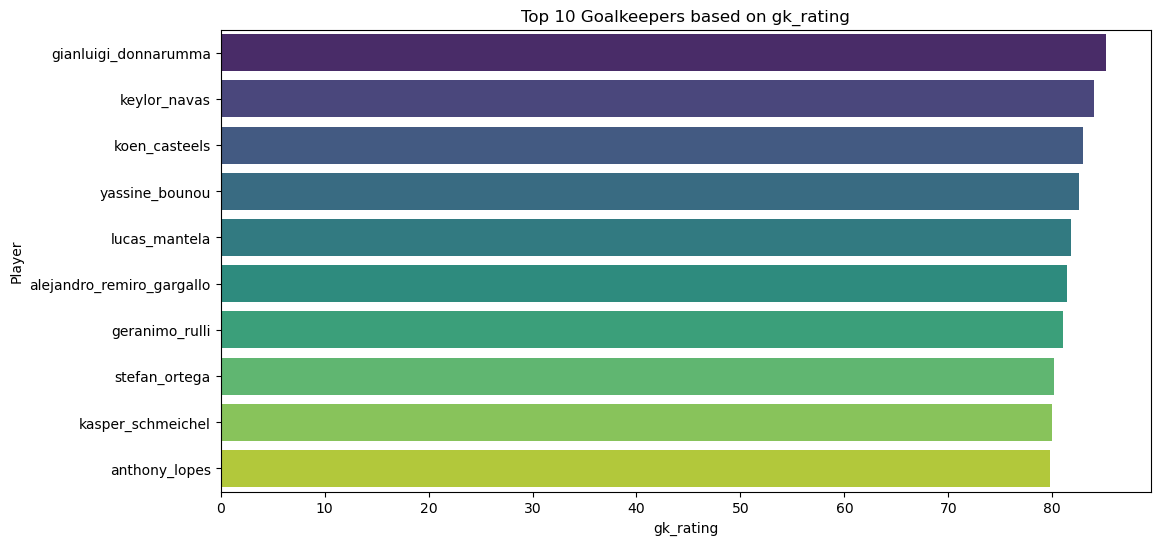

In [80]:
# Calculate gk_rating as the average of main goalkeeping attributes
df['gk_rating'] = df[['gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']].mean(axis=1)

# Find the top 10 goalkeepers based on gk_rating
top_10_goalkeepers = df.nlargest(10, 'gk_rating')[['player', 'country', 'gk_rating']]

# Plot the top 10 goalkeepers
plt.figure(figsize=(12, 6))
sns.barplot(x='gk_rating', y='player', data=top_10_goalkeepers, palette='viridis')
plt.title('Top 10 Goalkeepers based on gk_rating')
plt.xlabel('gk_rating')
plt.ylabel('Player')
plt.show()

df.drop(columns=['gk_rating'], inplace=True)

Only the 4 columns 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes' have been considered to generate a new column to find the top 10 goalkeepers solely on their ability to goalkeep.

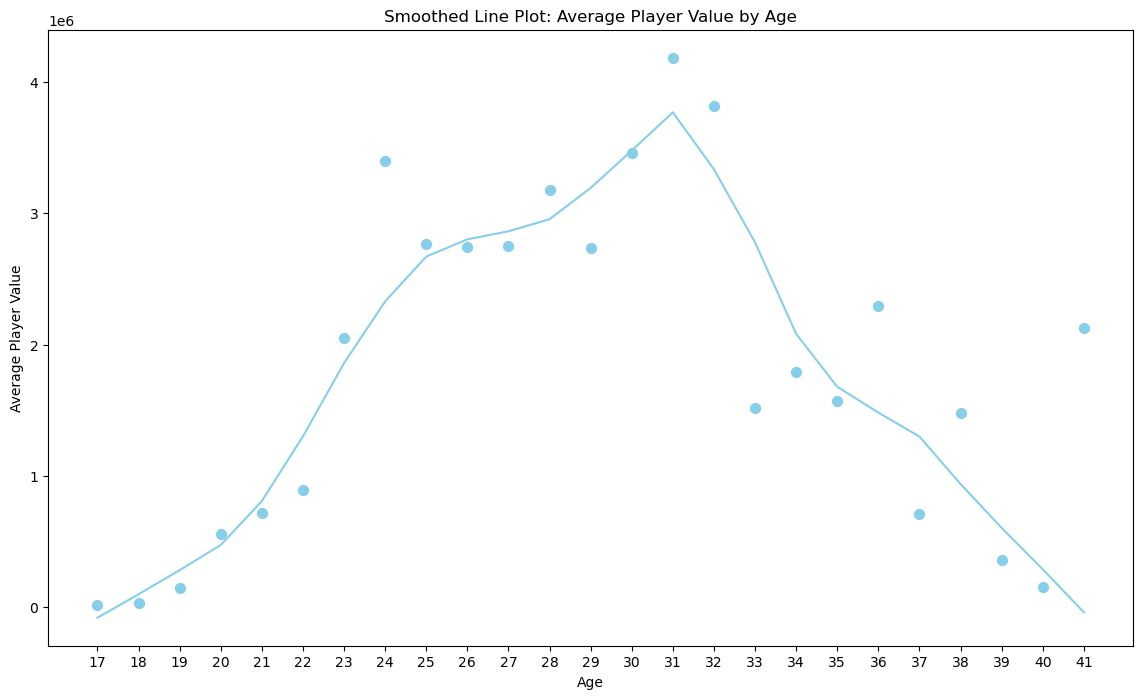

Peak Age = 31


In [81]:
# Group by age and calculate the average player value for each age
average_values_by_age = df.groupby('age')['value'].mean().reset_index()

# Apply lowess smoother
lowess = sm.nonparametric.lowess(average_values_by_age['value'], average_values_by_age['age'], frac=0.3)

# Create a line plot with lowess smoother
plt.figure(figsize=(14, 8))
plt.plot(average_values_by_age['age'], lowess[:, 1], color='skyblue')
plt.scatter(average_values_by_age['age'], average_values_by_age['value'], marker='o', color='skyblue', s=50)

# Identify the age where the average player value is highest
peak_age = average_values_by_age.loc[average_values_by_age['value'].idxmax(), 'age']

# Set x-axis ticks to show all age values
plt.xticks(average_values_by_age['age'])

plt.title('Smoothed Line Plot: Average Player Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Player Value')
plt.show()

print('Peak Age =', peak_age)

The Average peak age for a footballer is 31 based on their market value, which is the highest at that age. It steadily drops thereafter.

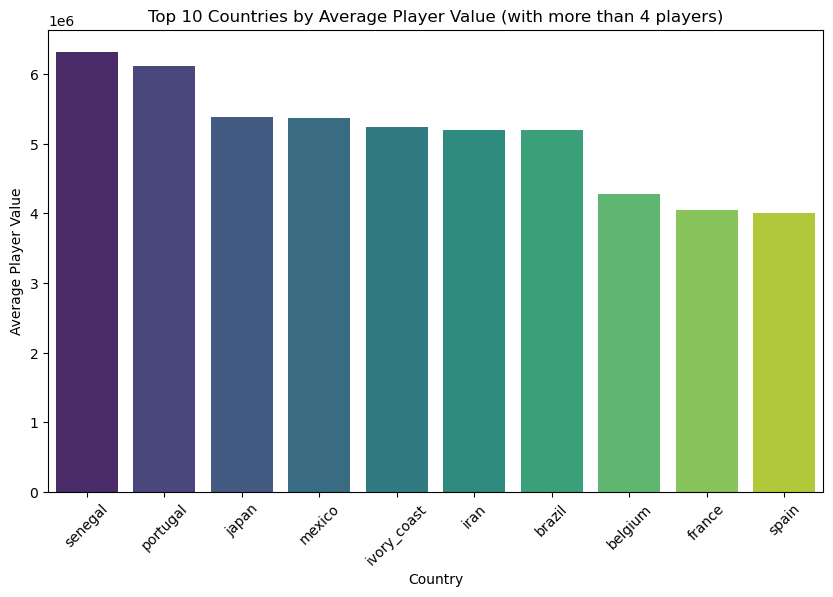

In [82]:
# Group by country and calculate the number of players for each country
players_per_country = df['country'].value_counts()

# Filter countries with more than 4 players
countries_with_more_than_4_players = players_per_country[players_per_country > 4].index

# Filter the original DataFrame based on selected countries
df_filtered = df[df['country'].isin(countries_with_more_than_4_players)]

# Group by country and calculate the average player value for each country
average_values_by_country = df_filtered.groupby('country')['value'].mean().reset_index()

# Get the top 10 countries based on average player value
top_10_countries = average_values_by_country.nlargest(10, 'value')

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='value', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Average Player Value (with more than 4 players)')
plt.xlabel('Country')
plt.ylabel('Average Player Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

These are the countries with players having the highest average value after filtering out the countries with less than 5 players

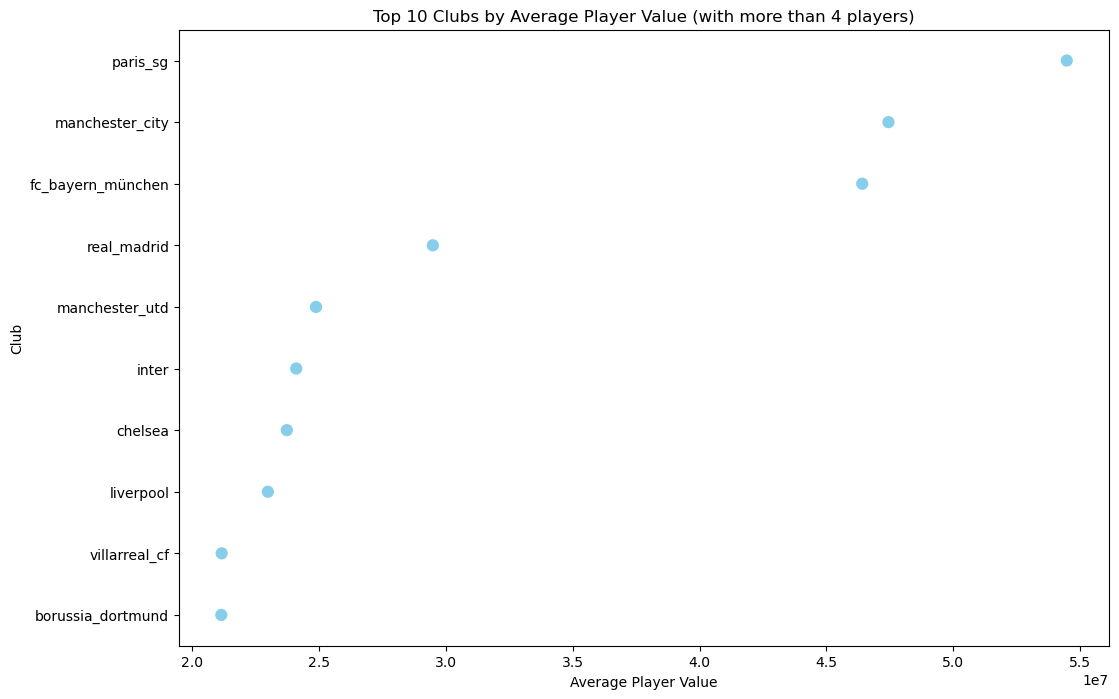

In [83]:
# Group by club and calculate the number of players for each club
players_per_club = df['club'].value_counts()

# Filter clubs with more than 4 players
clubs_with_more_than_4_players = players_per_club[players_per_club > 4].index

# Filter the original DataFrame based on selected clubs
df_filtered_clubs = df[df['club'].isin(clubs_with_more_than_4_players)]

# Group by club and calculate the average player value for each club
average_values_by_club = df_filtered_clubs.groupby('club')['value'].mean().reset_index()

# Get the top 10 clubs based on average player value
top_10_clubs = average_values_by_club.nlargest(10, 'value')

# Create a point plot
plt.figure(figsize=(12, 8))
sns.pointplot(x='value', y='club', data=top_10_clubs, color='skyblue', join=False)
plt.title('Top 10 Clubs by Average Player Value (with more than 4 players)')
plt.xlabel('Average Player Value')
plt.ylabel('Club')
plt.show()

PSG, Manchester City and Bayern are the top 3 clubs with the highest average player value after filtering out the clubs with less than 5 players

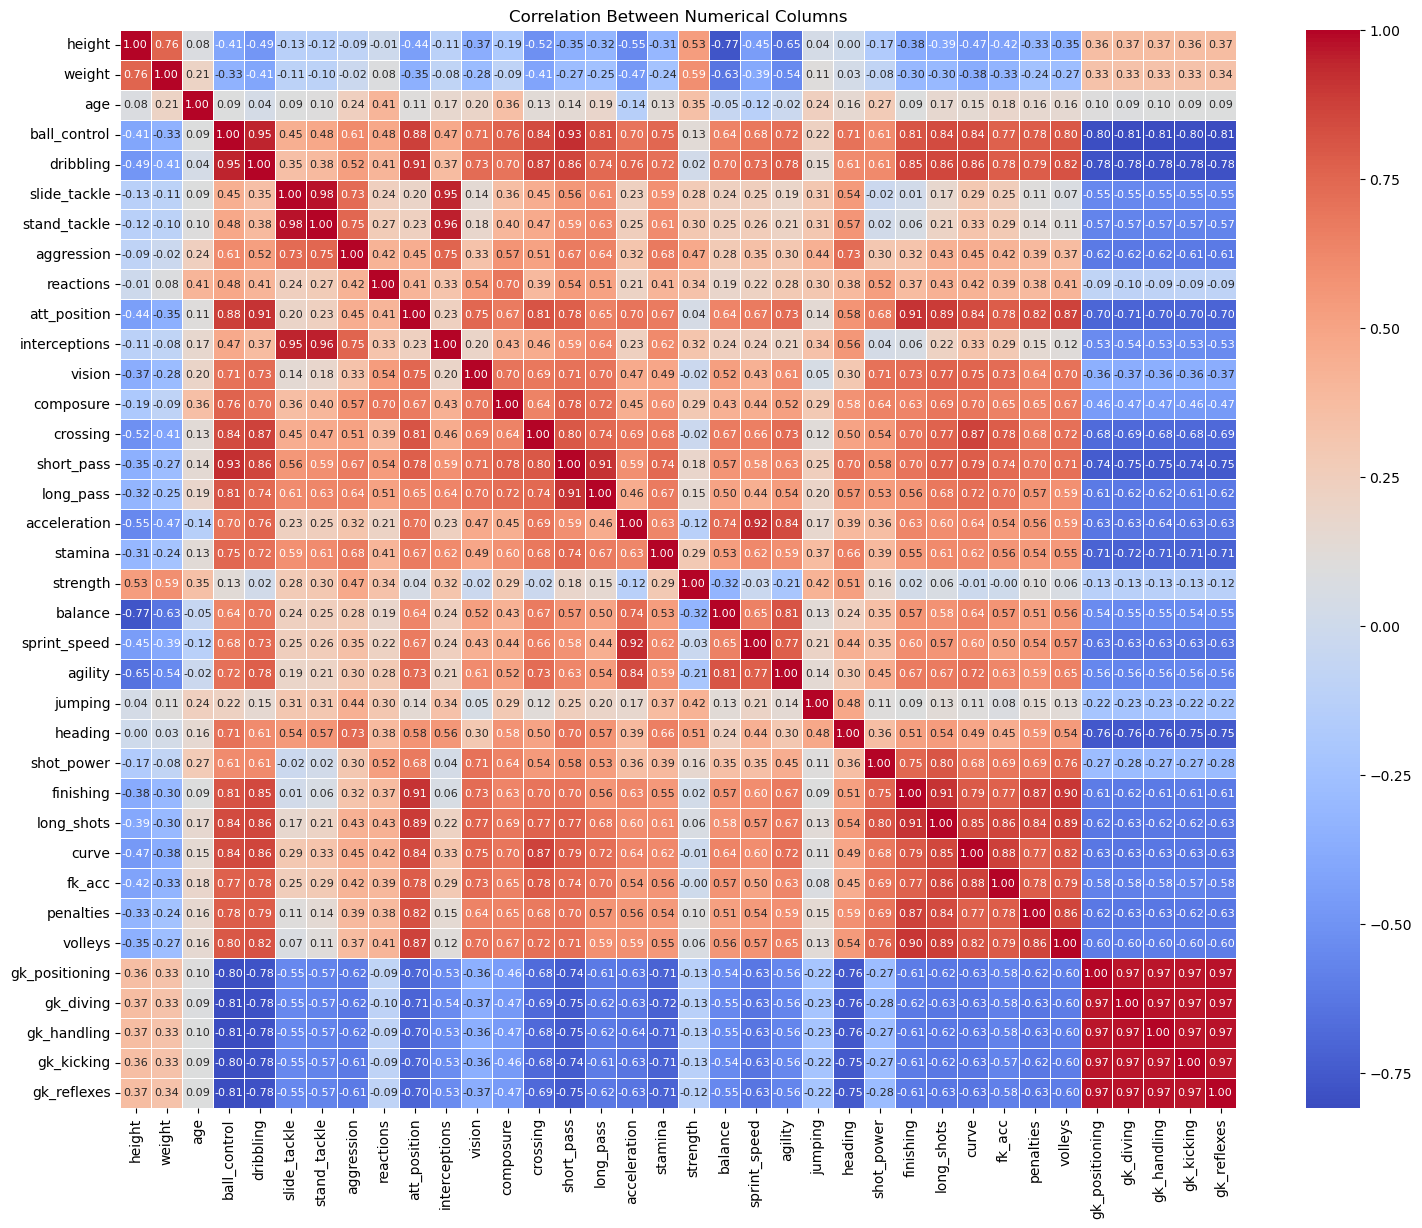

In [84]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Check correlation between numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Between Numerical Columns')
plt.show()

The goal keeper features are highly correlated. There is a good amount of correlation between other features as well.

### Distribution of value

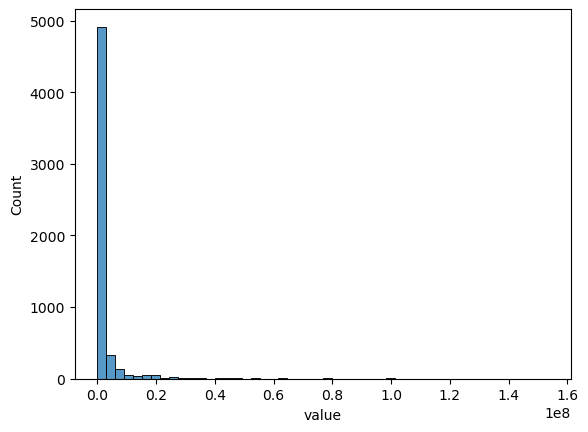

In [85]:
sns.histplot(df.value, bins=50);

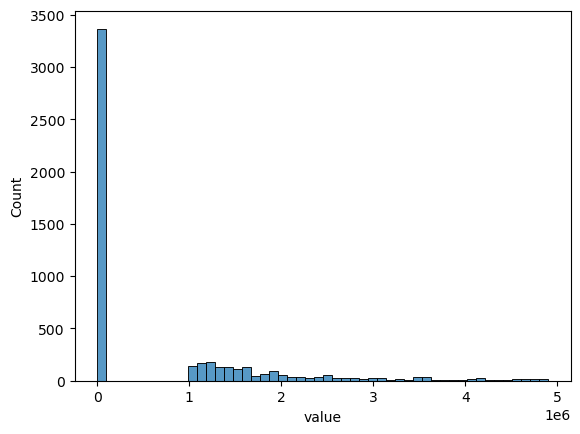

In [86]:
sns.histplot(df.value[df.value < 5000000], bins=50);

In [87]:
value_logs = np.log1p(df.value)

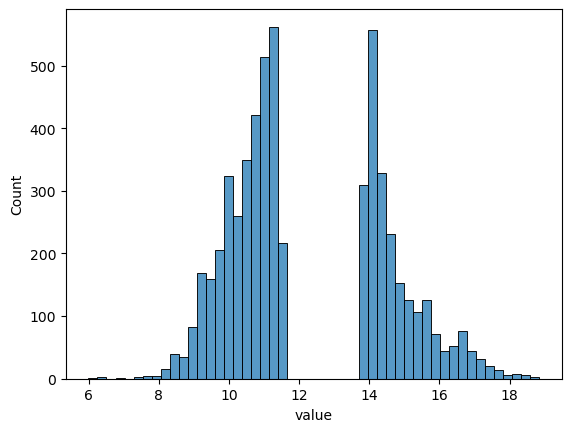

In [88]:
sns.histplot(value_logs, bins=50);

In [89]:
df['value_logs'] = value_logs

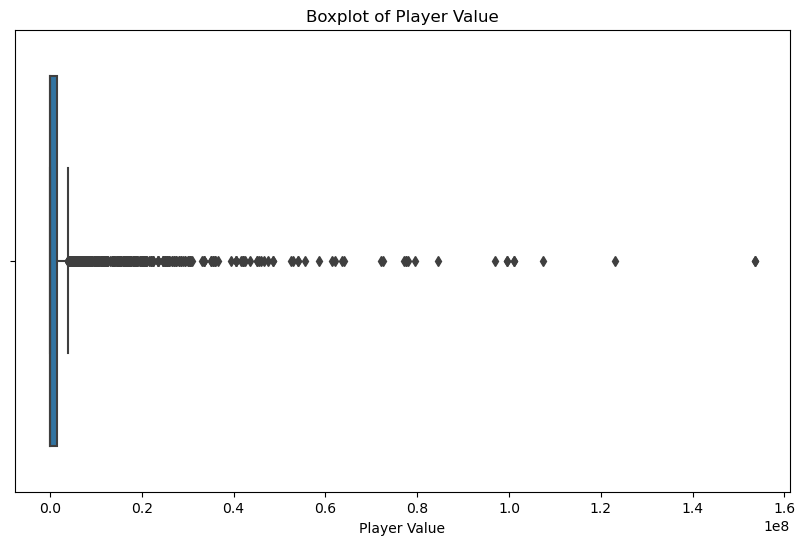

In [90]:
# Boxplot of player value
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value'], data=df)
plt.title('Boxplot of Player Value')
plt.xlabel('Player Value')
plt.show()

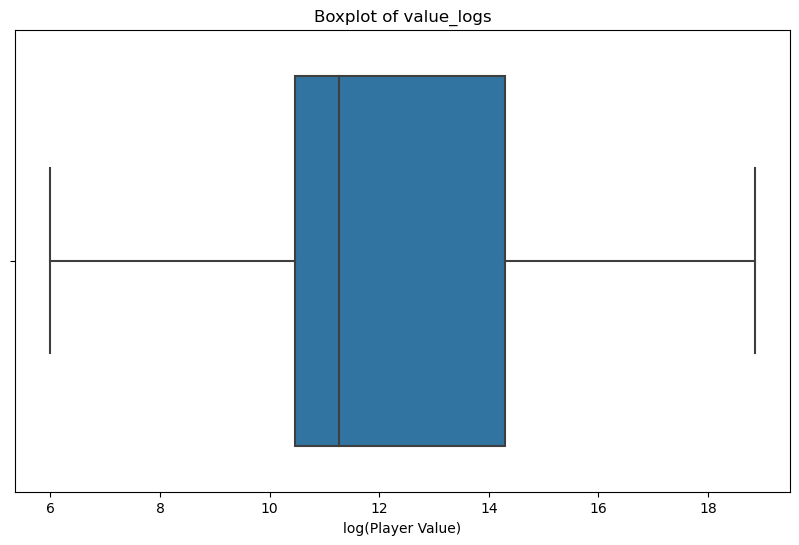

In [91]:
# Boxplot of value_logs
plt.figure(figsize=(10, 6))
sns.boxplot(x=value_logs, data=df)
plt.title('Boxplot of value_logs')
plt.xlabel('log(Player Value)')
plt.show()

The outliers have been dealt with using log transformation

In [92]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,value_logs
0,cristian_castro_devenish,colombia,192,84,22,atl._nacional,55,43,68,73,...,34,41,33,10,11,6,7,9,1400000,14.151984
1,silaldo_taffarel,brazil,181,80,31,corinthians,69,70,56,58,...,62,48,46,12,15,14,8,14,97500,11.487618
2,thomas_dahne,germany,193,84,29,holstein_kiel,25,12,13,16,...,15,26,16,64,74,65,68,74,1100000,13.910822
3,michael_sollbauer,austria,187,86,33,sk_rapid_wien,46,48,66,69,...,13,22,19,10,10,8,14,9,65000,11.082158
4,diego_segovia,uruguay,191,80,23,independiente,14,8,14,16,...,10,16,5,61,59,62,64,64,30000,10.308986


### Correlation Analysis

In [93]:
correlation = df.apply(lambda x : pd.factorize(x)[0]).corr()['value']
print(correlation)

player            0.044832
country          -0.029164
height            0.001538
weight            0.032543
age               0.060208
club              0.012477
ball_control      0.254042
dribbling         0.183230
slide_tackle      0.123096
stand_tackle      0.117663
aggression        0.056781
reactions         0.277410
att_position      0.184586
interceptions     0.122184
vision            0.187494
composure         0.184442
crossing          0.126060
short_pass        0.227204
long_pass         0.162116
acceleration      0.056696
stamina           0.039300
strength          0.023467
balance           0.032041
sprint_speed      0.036316
agility           0.016299
jumping           0.027670
heading           0.068350
shot_power        0.140082
finishing         0.155765
long_shots        0.129463
curve             0.146341
fk_acc            0.105039
penalties         0.101475
volleys           0.126059
gk_positioning    0.061008
gk_diving         0.050944
gk_handling       0.038585
g

In [94]:
# Normalizing them to reactions which has the highest correlation
normalized_correlation = correlation / correlation['reactions']
print(normalized_correlation)

player            0.161610
country          -0.105129
height            0.005543
weight            0.117308
age               0.217035
club              0.044976
ball_control      0.915764
dribbling         0.660504
slide_tackle      0.443731
stand_tackle      0.424149
aggression        0.204682
reactions         1.000000
att_position      0.665389
interceptions     0.440447
vision            0.675874
composure         0.664873
crossing          0.454419
short_pass        0.819017
long_pass         0.584391
acceleration      0.204375
stamina           0.141669
strength          0.084592
balance           0.115500
sprint_speed      0.130911
agility           0.058754
jumping           0.099746
heading           0.246385
shot_power        0.504964
finishing         0.561498
long_shots        0.466686
curve             0.527525
fk_acc            0.378641
penalties         0.365795
volleys           0.454415
gk_positioning    0.219921
gk_diving         0.183640
gk_handling       0.139091
g

In [95]:
# Set the threshold for correlation
correlation_threshold = 0.12

# Identify columns with correlation less than the threshold
low_correlation_columns = normalized_correlation[abs(normalized_correlation) < correlation_threshold].index

# Drop the identified columns from the DataFrame
df = df.drop(low_correlation_columns, axis=1)

df.head()

,player,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,value_logs
0,cristian_castro_devenish,22,55,43,68,73,72,68,30,65,...,34,41,33,10,11,6,7,9,1400000,14.151984
1,silaldo_taffarel,31,69,70,56,58,62,70,69,70,...,62,48,46,12,15,14,8,14,97500,11.487618
2,thomas_dahne,29,25,12,13,16,27,65,17,20,...,15,26,16,64,74,65,68,74,1100000,13.910822
3,michael_sollbauer,33,46,48,66,69,71,64,48,66,...,13,22,19,10,10,8,14,9,65000,11.082158
4,diego_segovia,23,14,8,14,16,28,50,10,12,...,10,16,5,61,59,62,64,64,30000,10.308986


In [96]:
print(low_correlation_columns)

Index(['country', 'height', 'weight', 'club', 'strength', 'balance', 'agility',
       'jumping'],
      dtype='object')


Considering the uniqueness of all values in the ‘player’ column, it would be beneficial to eliminate this column from the dataset

In [97]:
df.drop(columns=['player'], inplace=True)

In [98]:
df.head()

,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,value_logs
0,22,55,43,68,73,72,68,30,65,30,...,34,41,33,10,11,6,7,9,1400000,14.151984
1,31,69,70,56,58,62,70,69,70,64,...,62,48,46,12,15,14,8,14,97500,11.487618
2,29,25,12,13,16,27,65,17,20,49,...,15,26,16,64,74,65,68,74,1100000,13.910822
3,33,46,48,66,69,71,64,48,66,29,...,13,22,19,10,10,8,14,9,65000,11.082158
4,23,14,8,14,16,28,50,10,12,38,...,10,16,5,61,59,62,64,64,30000,10.308986


### Setting up the validation framework

In [99]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [100]:
len(df_train), len(df_val), len(df_test)

(3408, 1137, 1137)

In [101]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [102]:
y_train = df_train.value_logs.values
y_val = df_val.value_logs.values
y_test = df_test.value_logs.values
y_full_train = df_full_train.value_logs.values

In [103]:
del df_train['value']
del df_val['value']
del df_test['value']
del df_full_train['value']

In [104]:
del df_train['value_logs']
del df_val['value_logs']
del df_test['value_logs']
del df_full_train['value_logs']

In [105]:
df_train

,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
0,26,62,71,12,18,76,53,68,17,59,...,60,47,36,66,57,10,15,11,14,14
1,31,64,45,66,70,62,66,41,65,35,...,34,53,43,42,36,11,12,13,9,16
2,27,57,56,60,64,61,60,52,61,53,...,29,45,31,37,20,10,14,9,9,5
3,26,60,59,59,60,58,57,59,59,54,...,34,54,44,33,33,7,10,7,9,11
4,20,63,61,53,56,62,60,56,60,62,...,48,48,46,48,34,8,15,5,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,25,55,30,70,72,75,65,29,68,26,...,50,24,29,49,25,5,8,15,9,15
3404,23,55,50,68,69,71,66,27,73,31,...,29,34,35,41,34,14,15,8,7,11
3405,25,30,23,10,11,23,67,4,16,52,...,9,14,13,12,8,60,67,63,62,67
3406,20,14,11,11,13,23,47,5,13,32,...,8,11,10,13,7,51,55,56,53,59


### Training Models

#### Ridge Regression

In [106]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Define the alpha values for tuning the model
alpha_values = [0.00001, 0.0001, 0.001, 0.1, 1, 10]

# Initialize a dictionary to store the RMSE for each alpha value
rmse_scores = {}

X_train = df_train.values
X_val = df_val.values
X_test = df_test.values
X_full_train = df_full_train.values

# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the training features and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test features using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_full_train_scaled = scaler.fit_transform(X_full_train)

# Iterate over each alpha value
for alpha in alpha_values:
    # Initialize the Ridge Regression model
    model = Ridge(alpha=alpha, random_state=42)

    # Fit the model to the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled validation set
    y_val_pred = model.predict(X_val_scaled)

    # Undo the log transformation on the predictions
    y_val_pred_exp = np.expm1(y_val_pred)

    # Undo the log transformation on the actual target values
    y_val_exp = np.expm1(y_val)

    # Calculate the RMSE of the predictions
    rmse = np.sqrt(mean_squared_error(y_val_exp, y_val_pred_exp))

    # Store the RMSE score corresponding to the current alpha value
    rmse_scores[alpha] = rmse

# Print the RMSE scores
for alpha, rmse in rmse_scores.items():
    print(f'Alpha: {alpha}, RMSE: {rmse.round(2)}')

Alpha: 1e-05, RMSE: 3045947.06
Alpha: 0.0001, RMSE: 3045937.36
Alpha: 0.001, RMSE: 3045840.36
Alpha: 0.1, RMSE: 3035306.16
Alpha: 1, RMSE: 2950727.69
Alpha: 10, RMSE: 2714868.29


Alpha = 10 gives the least RMSE on the validation set

In [107]:
    # Initialize the Ridge Regression model with the best alpha value
    best_alpha = 10
    best_model = Ridge(alpha=best_alpha, random_state=42)

    # Fit the model to the scaled training data
    best_model.fit(X_full_train_scaled, y_full_train)

    # Make predictions on the scaled test set
    y_test_pred = best_model.predict(X_test_scaled)

    # Undo the log transformation on the predictions
    y_test_pred_exp = np.expm1(y_test_pred)

    # Undo the log transformation on the actual target values
    y_test_exp = np.expm1(y_test)

    # Calculate the RMSE of the predictions
    rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_exp))

    # Print the RMSE
    print(f'Test RMSE: {rmse_test.round(2)}')

Test RMSE: 3188524.64


In [108]:
rmse_test/abs(y_test_exp.mean())

1.383382560433321

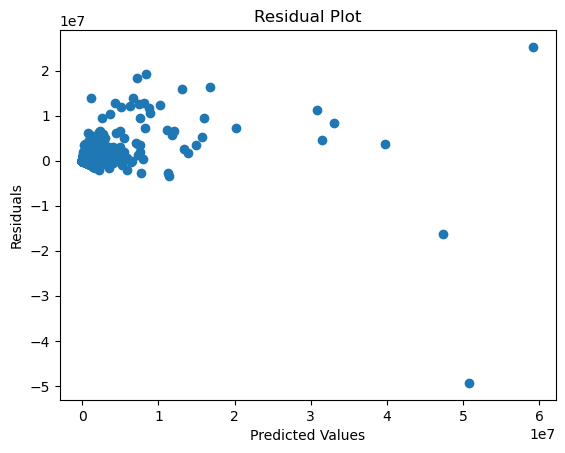

In [109]:
# Residual plot
# Calculate the residuals
residuals = y_val_exp - y_val_pred_exp

# Create a scatter plot
plt.scatter(y_val_pred_exp, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

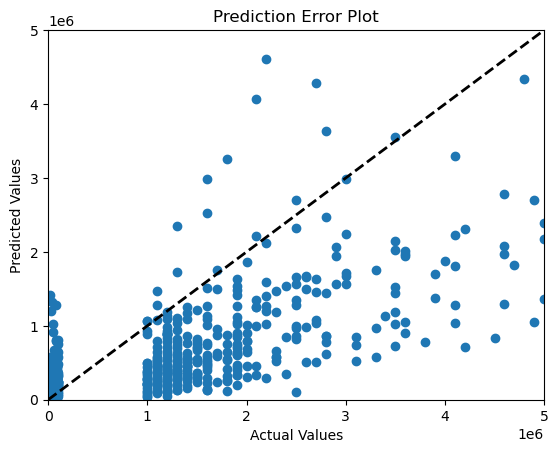

In [110]:
# Prediction error plot 
plt.scatter(y_test_exp, y_test_pred_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.xlim(0,5000000)
plt.ylim(0,5000000)
plt.show()

#### Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    'max_depth': [1, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 10, 50]
}

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the Grid Search CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 170}


In [112]:
# Train a new Random Forest with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation set
y_val_pred = best_rf.predict(X_val_scaled)

# Undo the log transformation on the predictions
y_val_pred_exp = np.expm1(y_val_pred)

# Undo the log transformation on the actual target values
y_val_exp = np.expm1(y_val)

# Calculate the RMSE of the predictions
rmse_val = np.sqrt(mean_squared_error(y_val_exp, y_val_pred_exp))

# Print the RMSE
print(f'Validation RMSE: {rmse_val}')

Validation RMSE: 2260098.2875757026


In [114]:
# Make predictions on the scaled test set
best_rf.fit(X_full_train_scaled, y_full_train)
y_test_pred = best_rf.predict(X_test_scaled)

# Undo the log transformation on the predictions
y_test_pred_exp = np.expm1(y_test_pred)

# Undo the log transformation on the actual target values
y_test_exp = np.expm1(y_test)

# Calculate the RMSE of the predictions
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_exp))

# Print the RMSE
print(f'Test RMSE: {rmse_test}')

Test RMSE: 2790587.43856446


In [115]:
rmse_test/abs(y_test_exp.mean())

1.2107323707508446

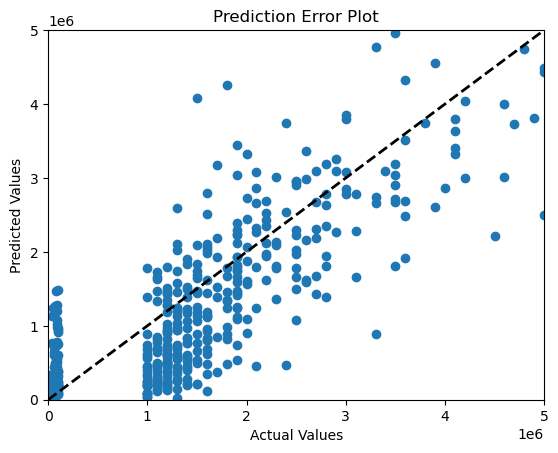

In [116]:
# Prediction error plot 
plt.scatter(y_test_exp, y_test_pred_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.xlim(0,5000000)
plt.ylim(0,5000000)
plt.show()

In [121]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': range(10, 220, 40),
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.05, 0.10, 0.15],
    "min_child_weight": [ 1, 3, 5, 7],
    "gamma":[ 0.0, 0.1, 0.2],
    "colsample_bytree":[ 0.3, 0.4],
}

# Initialize an XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Initialize the Grid Search CV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


In [124]:
print(best_params)

{'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 210}


In [122]:
# Train a new XGBoost with the best parameters
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation set
y_val_pred = best_xgb.predict(X_val_scaled)

# Undo the log transformation on the predictions
y_val_pred_exp = np.expm1(y_val_pred)

# Undo the log transformation on the actual target values
y_val_exp = np.expm1(y_val)

# Calculate the RMSE of the predictions
rmse_val = np.sqrt(mean_squared_error(y_val_exp, y_val_pred_exp))

# Print the RMSE
print(f'Validation RMSE: {rmse_val}')

Validation RMSE: 1697047.9390391519


In [125]:
# Make predictions on the scaled test set
best_xgb.fit(X_full_train_scaled, y_full_train)
y_test_pred = best_xgb.predict(X_test_scaled)

# Undo the log transformation on the predictions
y_test_pred_exp = np.expm1(y_test_pred)

# Undo the log transformation on the actual target values
y_test_exp = np.expm1(y_test)

# Calculate the RMSE of the predictions
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_exp))

# Print the RMSE
print(f'Test RMSE: {rmse_test}')

Test RMSE: 2704107.768445301


In [126]:
rmse_test/abs(y_test_exp.mean())

1.1732120499115226

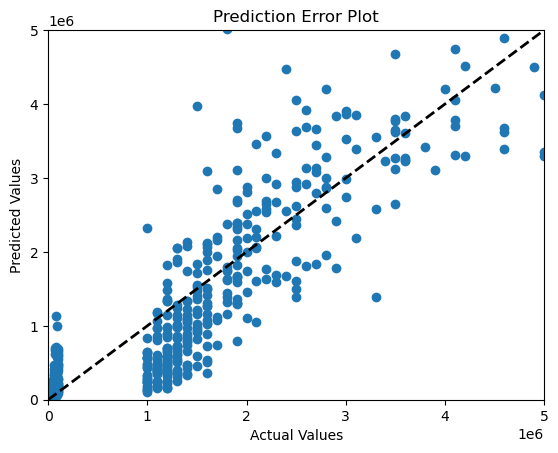

In [127]:
# Prediction error plot 
plt.scatter(y_test_exp, y_test_pred_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.xlim(0,5000000)
plt.ylim(0,5000000)
plt.show()

The xgboost regressor gives the best results. Hence, it is chosen as the final model.

In [130]:
# Get feature importances
importances = best_xgb.feature_importances_

# Convert feature importances into a DataFrame
importance_df = pd.DataFrame({'feature': list(df_train.columns), 'importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('importance', ascending=False)

# Print the feature importances
print(importance_df)

           feature  importance
6        reactions    0.213220
12      short_pass    0.167953
1     ball_control    0.128866
2        dribbling    0.084306
26       gk_diving    0.052053
4     stand_tackle    0.036682
3     slide_tackle    0.034309
8    interceptions    0.031284
0              age    0.028253
17         heading    0.024894
29     gk_reflexes    0.020904
10       composure    0.020206
19       finishing    0.019012
25  gk_positioning    0.017322
16    sprint_speed    0.016417
15         stamina    0.014547
7     att_position    0.012168
11        crossing    0.011445
14    acceleration    0.010019
18      shot_power    0.009983
27     gk_handling    0.008425
9           vision    0.007559
28      gk_kicking    0.006915
5       aggression    0.005577
24         volleys    0.004215
21           curve    0.003064
23       penalties    0.003049
20      long_shots    0.002799
22          fk_acc    0.002348
13       long_pass    0.002205


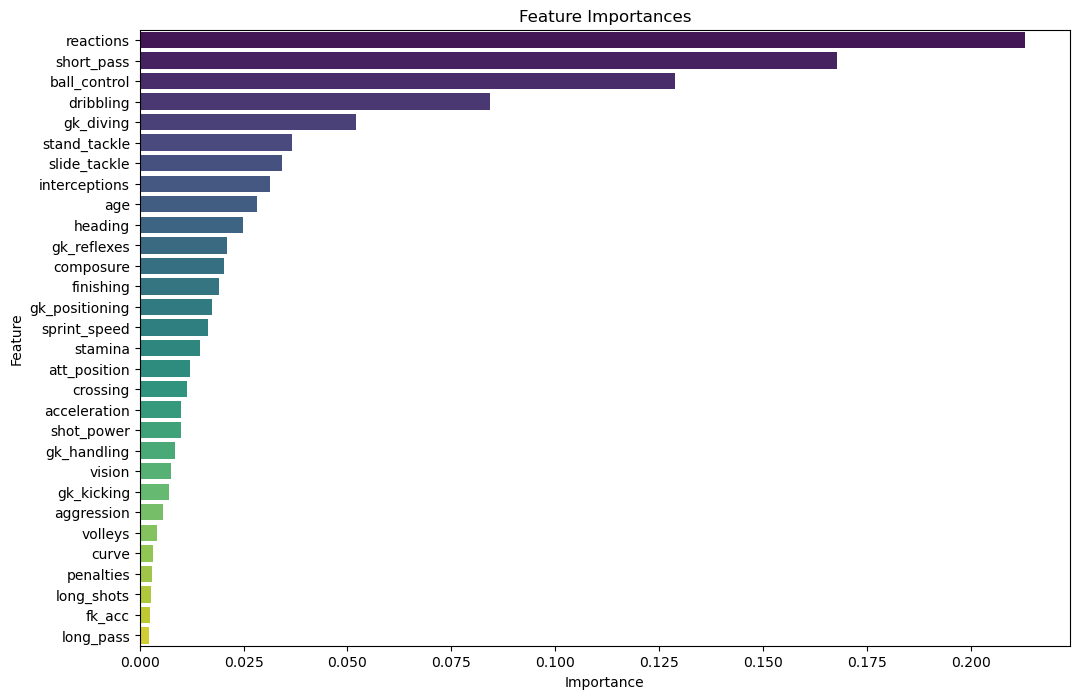

In [131]:
# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

reactions, short_pass and ball_control are the top 3 important features